<a href="https://colab.research.google.com/github/CharlesKasasira/Learning-Machine-Learning/blob/main/Neural_Networks_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show(close=None, block=None)>

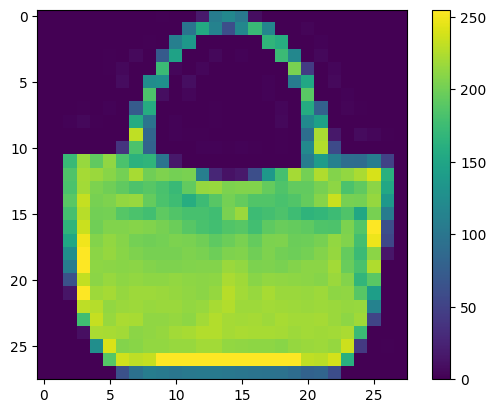

In [11]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
train_images = train_images / 255

test_images = test_images / 255

Creating the model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # Hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3) 10output neurons because we have 10 categories
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 3.4160 - accuracy: 0.6869
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7273 - accuracy: 0.7325
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6437 - accuracy: 0.7525
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6109 - accuracy: 0.7632
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5863 - accuracy: 0.7757
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5607 - accuracy: 0.7906
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5478 - accuracy: 0.8052
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5291 - accuracy: 0.8191
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5181 - accuracy: 0.8277
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.501

Evaluating Model

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5593 - accuracy: 0.8210
Test accuracy:  0.8209999799728394


313/313 [==============================] - 1s 2ms/step
Ankle boot


<function matplotlib.pyplot.show(close=None, block=None)>

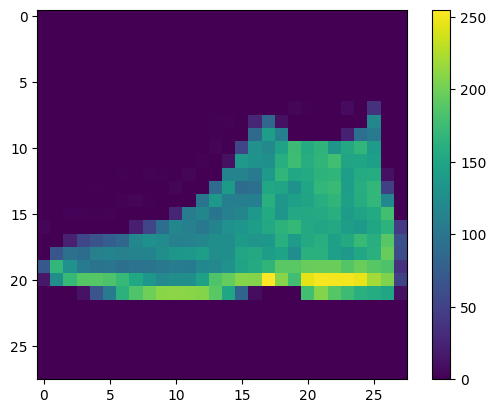

In [23]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show